In [2]:
import json

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/smartmeters_kanal_129.csv')
df.head()

/var/folders/mw/x398f5s545bffd989r6xpm100000gp/T/ipykernel_61678/1406385456.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/smartmeters_kanal_129.csv')


,Power,Timeslot,Datum,Kanal,Messpunkt_ID,Timestamp,Year,OHE_Labels,KLEINANSCHLUSS
0,0.0250,00:00-00:15,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:00:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen
1,0.0150,00:15-00:30,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:15:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen
2,0.0200,00:30-00:45,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:30:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen
3,0.0200,00:45-01:00,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:45:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen
4,0.0175,01:00-01:15,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 01:00:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen


In [4]:
df = df[df["OHE_Labels"].notna()]

In [5]:
print(f"Messpunkt_ID: {len(df['Messpunkt_ID'].unique())}")

Messpunkt_ID: 265


In [6]:
# Convert string representation into a list
df['OHE_Labels'] = df['OHE_Labels'].apply(lambda x: eval(x))

In [7]:
with open("data/oocs/idx2label_oocs.json") as f:
    idx2label = json.load(f)
idx2label

{'0': 'Autoladestation',
 '1': 'Beleuchtung',
 '2': 'Blockspeicher',
 '3': 'Boiler',
 '4': 'Direktheizung',
 '5': 'Doppeltarif Privatzähler',
 '6': 'Einspeiser Photovoltaik Anlage',
 '7': 'Einzelspeicher',
 '8': 'Saunaofen',
 '9': 'Tumbler',
 '10': 'Unknown',
 '11': 'WP Boiler',
 '12': 'Waschmaschine',
 '13': 'Waschmaschine und Tumbler',
 '14': 'Wärmepumpe'}

In [8]:
for idx, label in idx2label.items():
    df[label] = df['OHE_Labels'].apply(lambda x: x[int(idx)])
df.head()

,Power,Timeslot,Datum,Kanal,Messpunkt_ID,Timestamp,Year,OHE_Labels,KLEINANSCHLUSS,Autoladestation,...,Doppeltarif Privatzähler,Einspeiser Photovoltaik Anlage,Einzelspeicher,Saunaofen,Tumbler,Unknown,WP Boiler,Waschmaschine,Waschmaschine und Tumbler,Wärmepumpe
0,0.0250,00:00-00:15,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:00:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0150,00:15-00:30,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:15:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0200,00:30-00:45,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:30:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0200,00:45-01:00,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 00:45:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0175,01:00-01:15,20220301,1.29,CH1024201234500000000000010008561,2022-03-01 01:00:00,2022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Hausanschluss innen,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
df.to_csv("data/check_distribution_labels.csv", index=False)

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


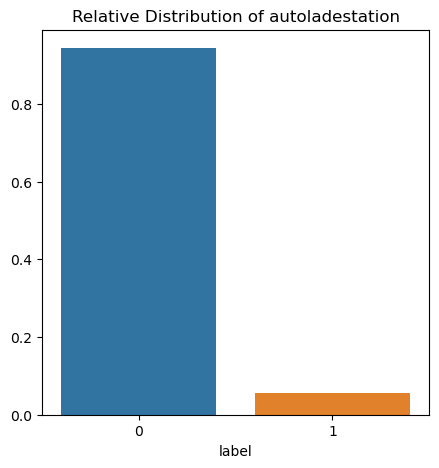

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


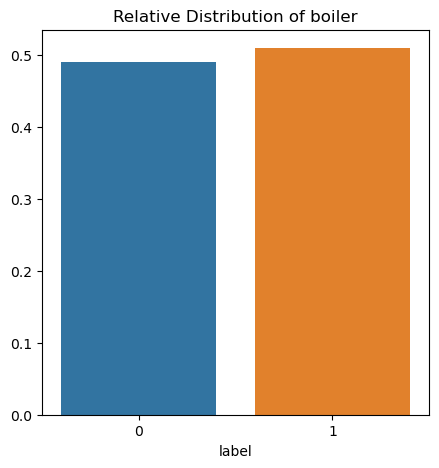

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


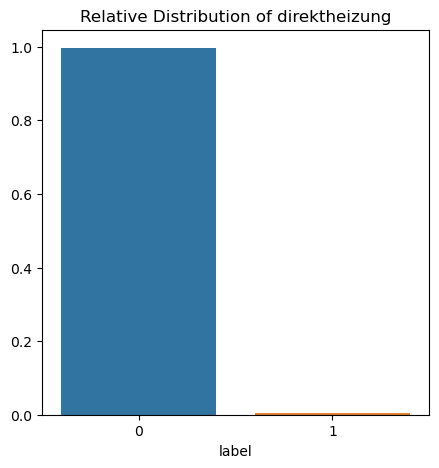

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


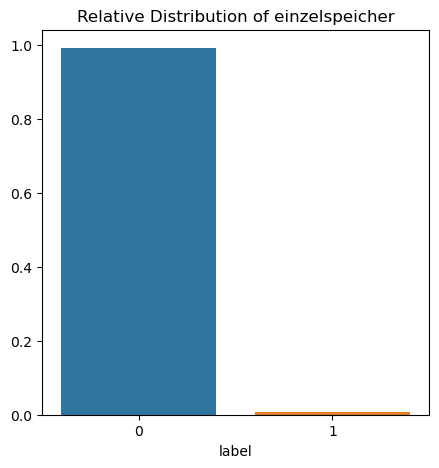

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


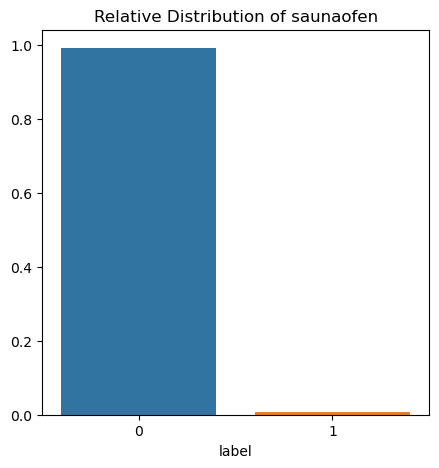

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


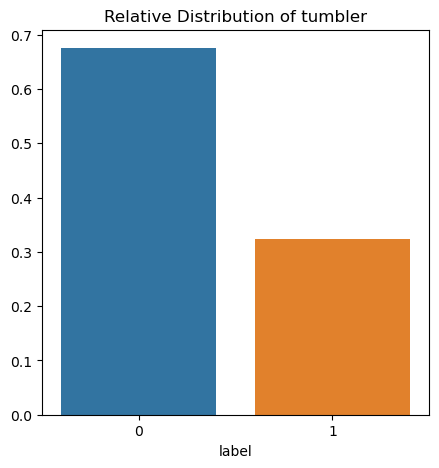

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


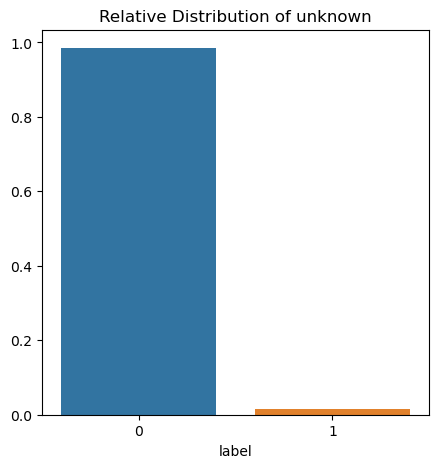

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


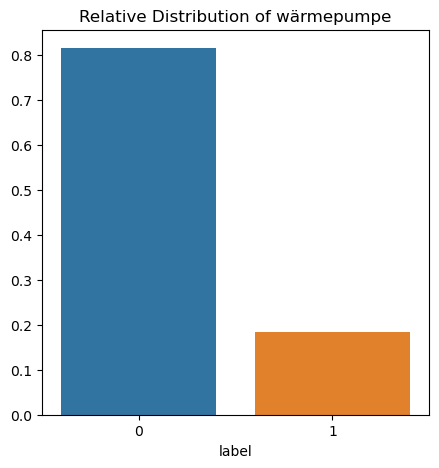

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


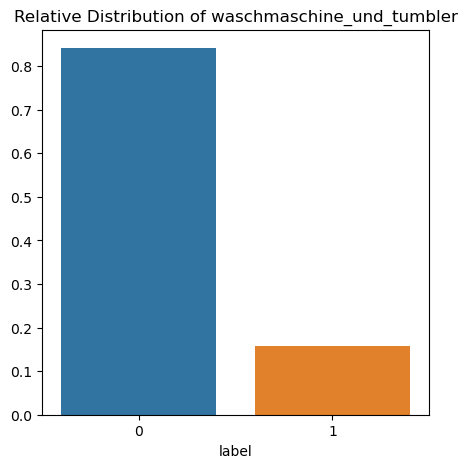

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


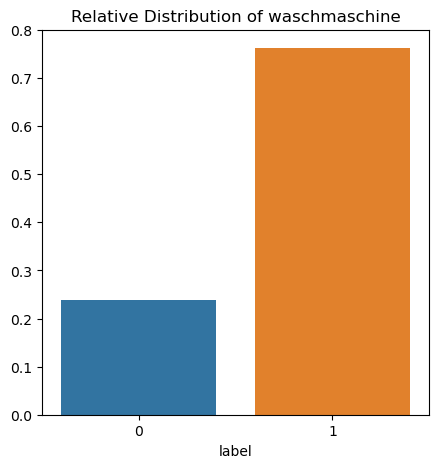

/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haris.alic/miniconda3/envs/csp1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


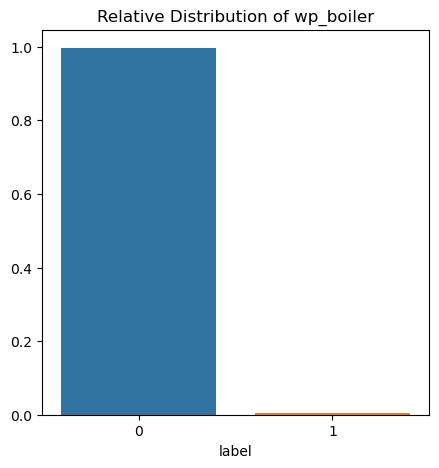

In [25]:
columns = ["autoladestation","boiler","direktheizung","einzelspeicher","saunaofen","tumbler","unknown","wärmepumpe","waschmaschine_und_tumbler","waschmaschine","wp_boiler"]
# loop through all columns and plot relative
# frequency for each column
for col in columns:
    df = pd.read_csv(f"labels/{col}.csv")
    label_counts = df['label'].value_counts(normalize=True)
    plt.figure(figsize=(5, 5))
    plt.title(f"Relative Distribution of {col}")
    sns.barplot(x=label_counts.index, y=label_counts.values)
    plt.show()